In [1]:
import numpy as np 
import networkx as nx
import pickle
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import distance_matrix

from sys import stdout

from fatbox.preprocessing import simple_threshold_binary, skeleton_guo_hall, array_to_points
from fatbox.edits import label_components, simplify
from fatbox.plots import plot_components

In [2]:
import numpy as np 
import networkx as nx
import pickle
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import distance_matrix

from sys import stdout

from fatbox.preprocessing import simple_threshold_binary, skeleton_guo_hall, array_to_points
from fatbox.edits import label_components, simplify
from fatbox.plots import plot_components

In [12]:
strain_rate = np.load(r'D:\PYTHON\fatbox\fatbox_tutorials\Numerical_models\1-fault_extraction\NearSurfaceIsotherm_335K_strain_rate.npy')
strain_rate = strain_rate[:400,250:450]

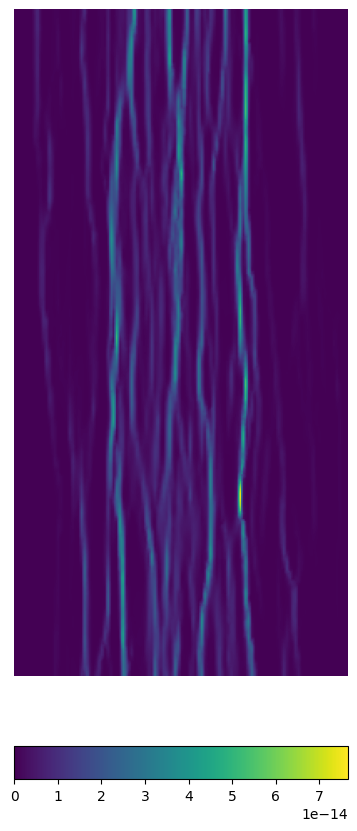

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(strain_rate, vmin=0)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()

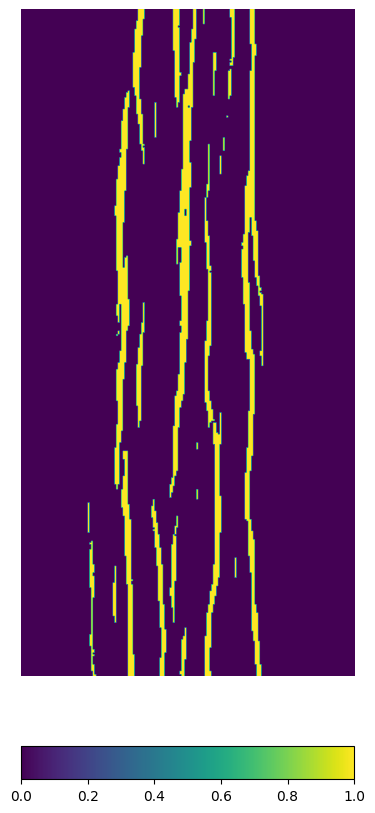

In [14]:
threshold = simple_threshold_binary(strain_rate, 1.2e-14)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(threshold, vmin=0, vmax=1)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()

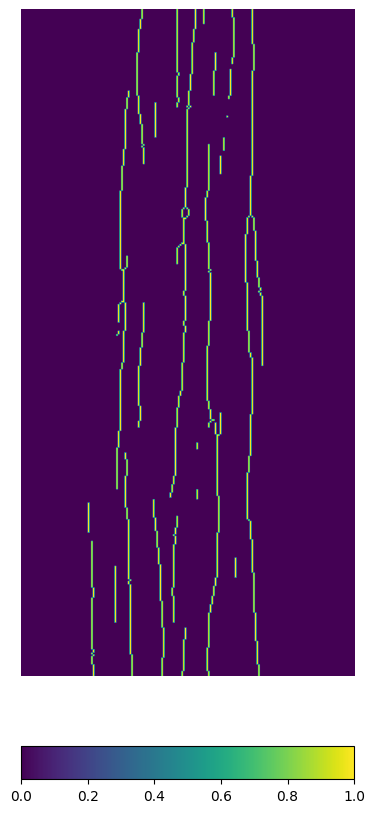

In [15]:
skeleton = skeleton_guo_hall(threshold)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(skeleton, vmin=0, vmax=1)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()

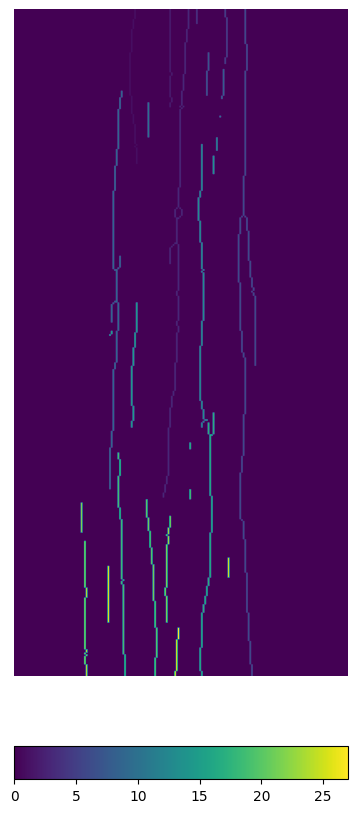

In [16]:
ret, markers = cv2.connectedComponents(skeleton)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(markers, vmin=0)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()

In [17]:
G = nx.Graph()

node = 0
for comp in range(1,ret):

    points = np.transpose(np.vstack((np.where(markers==comp))))    
    
    for point in points:
        G.add_node(node)
        G.nodes[node]['pos'] = (point[1], point[0])
        G.nodes[node]['component'] = comp
        node += 1  

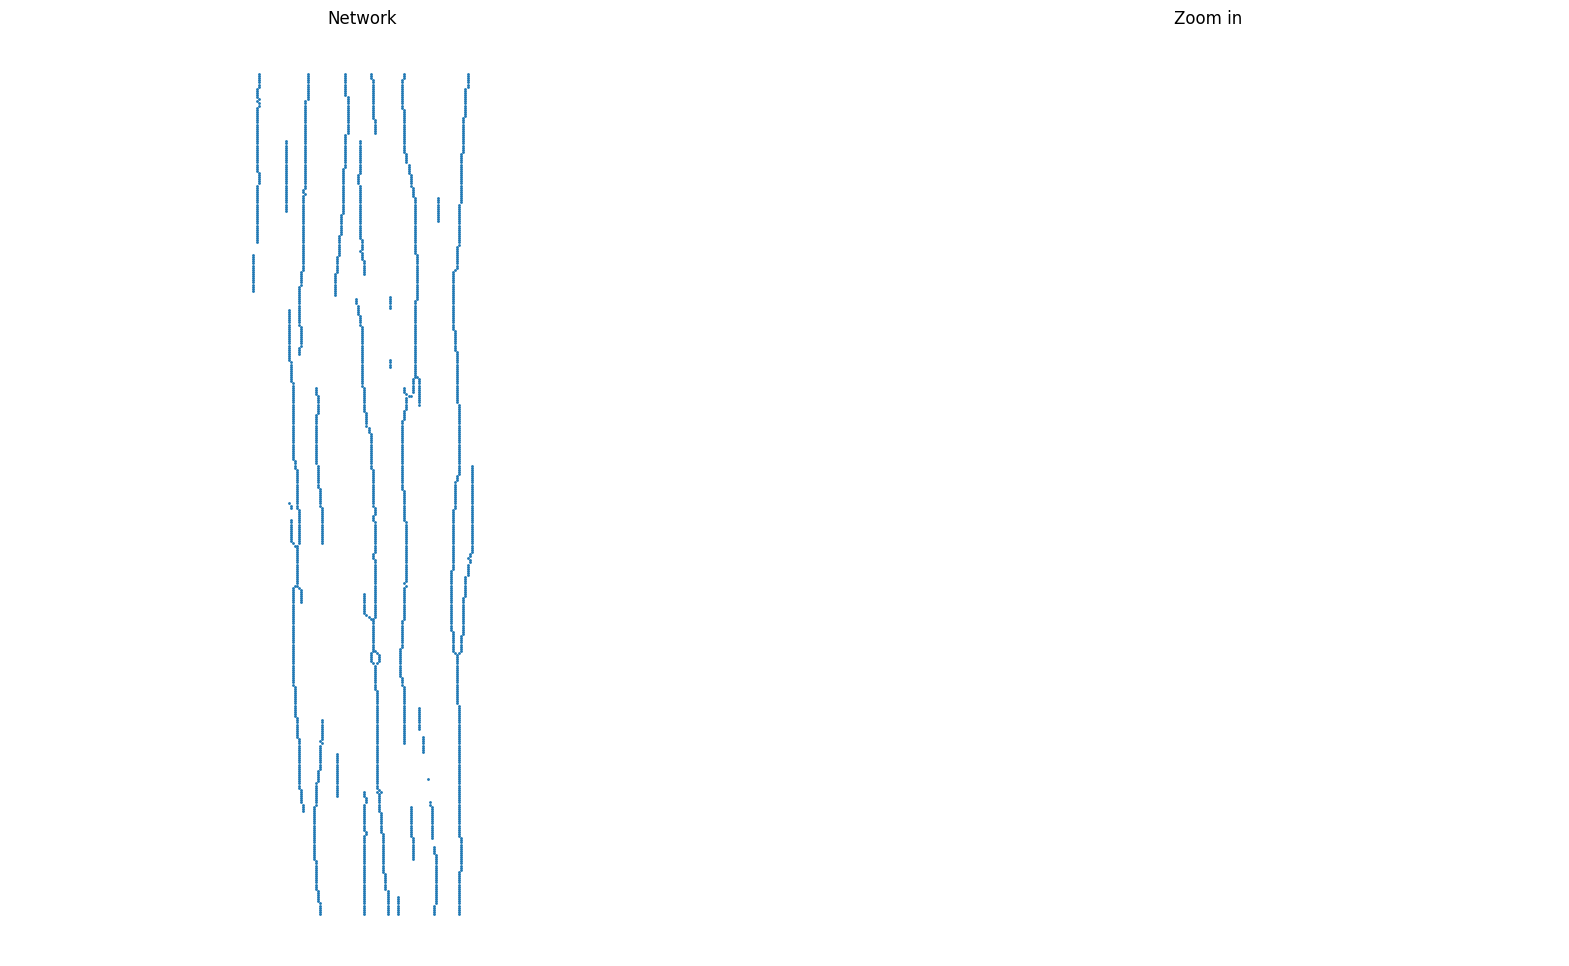

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20,12))

axs[0].set_title('Network')
nx.draw(G, 
        pos=nx.get_node_attributes(G, 'pos'), 
        node_size=1,
        ax=axs[0])
axs[0].axis('equal')


axs[1].set_title('Zoom in')
nx.draw(G, 
        pos=nx.get_node_attributes(G, 'pos'), 
        node_size=1,
        ax=axs[1])
axs[1].axis('equal')
axs[1].set_ylim([500, 600])

plt.show()

In [19]:
for comp in range(1,ret): 
    
    points = [G.nodes[node]['pos'] for node in G if G.nodes[node]['component']==comp]
    nodes  = [node for node in G if G.nodes[node]['component']==comp]

    dm = distance_matrix(points, points)  
    
    
    for n in range(len(points)):
        # print(n)
        for m in range(len(points)):
            if dm[n,m]<1.5 and n != m:
                G.add_edge(nodes[n],nodes[m])

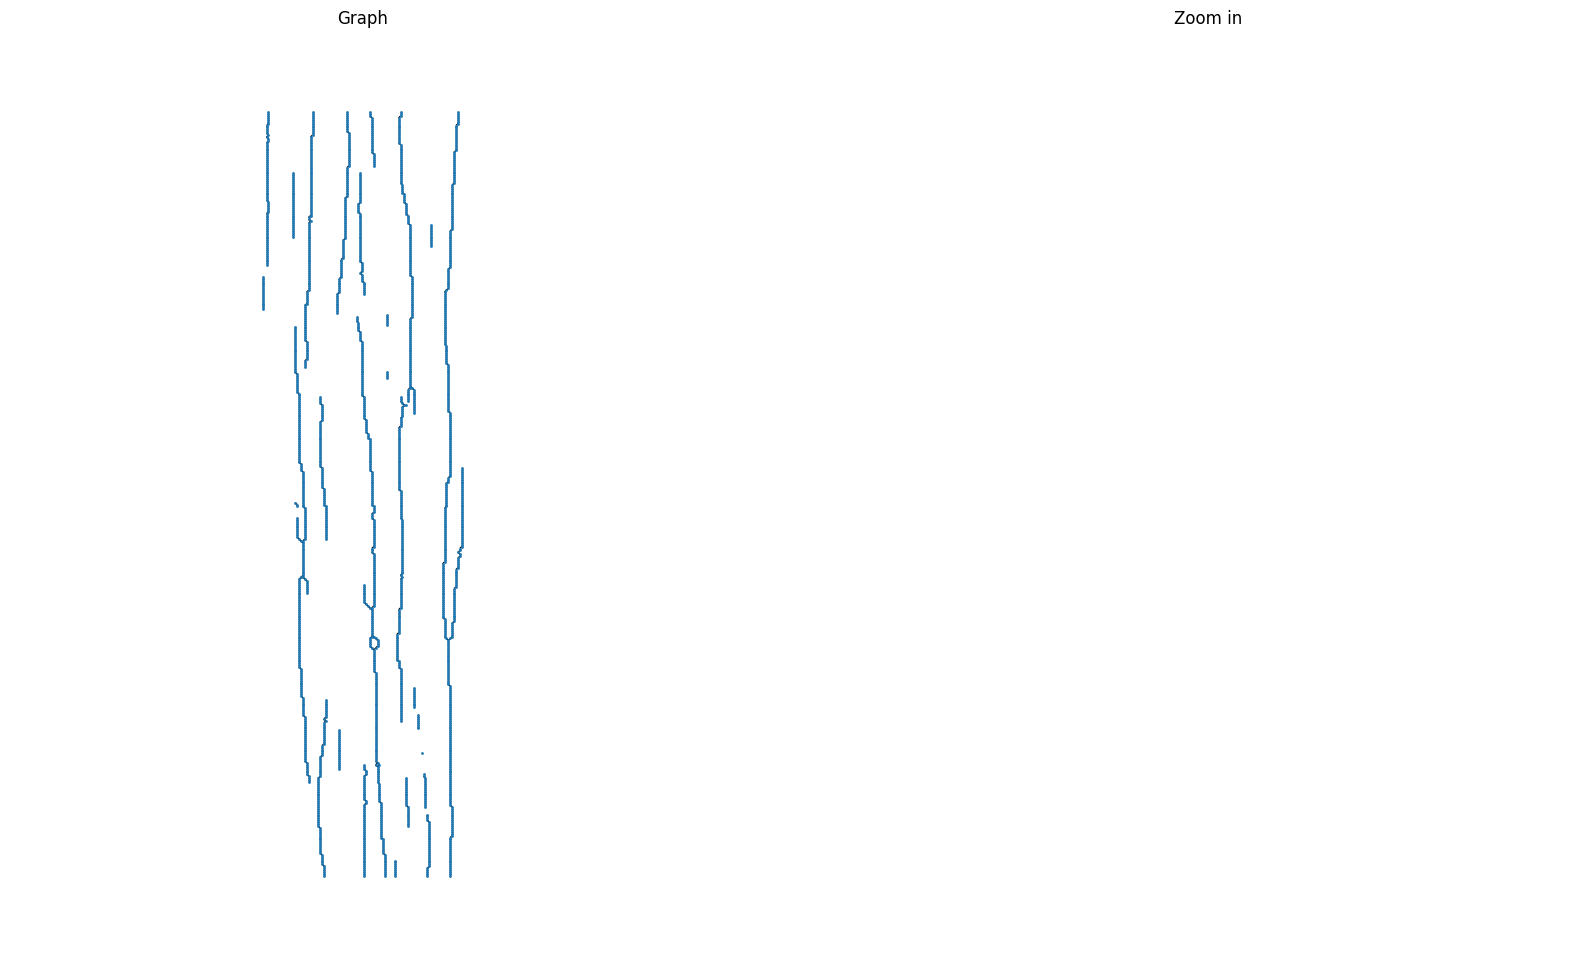

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20,12))

axs[0].set_title('Graph')
nx.draw(G, 
        pos=nx.get_node_attributes(G, 'pos'), 
        node_size=1,
        ax=axs[0])
axs[0].axis('equal')


axs[1].set_title('Zoom in')
nx.draw(G, 
        pos=nx.get_node_attributes(G, 'pos'), 
        node_size=1,
        ax=axs[1])
axs[1].axis('equal')
axs[1].set_ylim([500, 600])

plt.show()

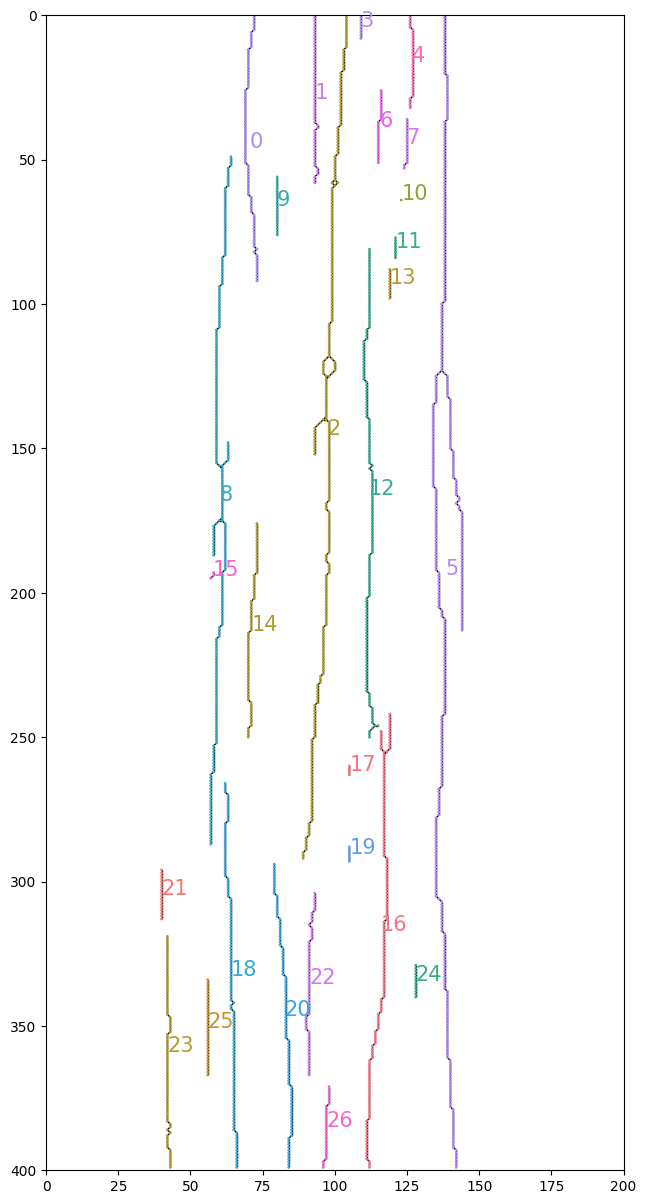

In [21]:
G = label_components(G)

fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.imshow(np.zeros_like(strain_rate), 'gray_r', vmin=0)
plot_components(G, node_size=1, ax=ax)
ax.set_xlim(0,200)
ax.set_ylim(400,0)
plt.show()

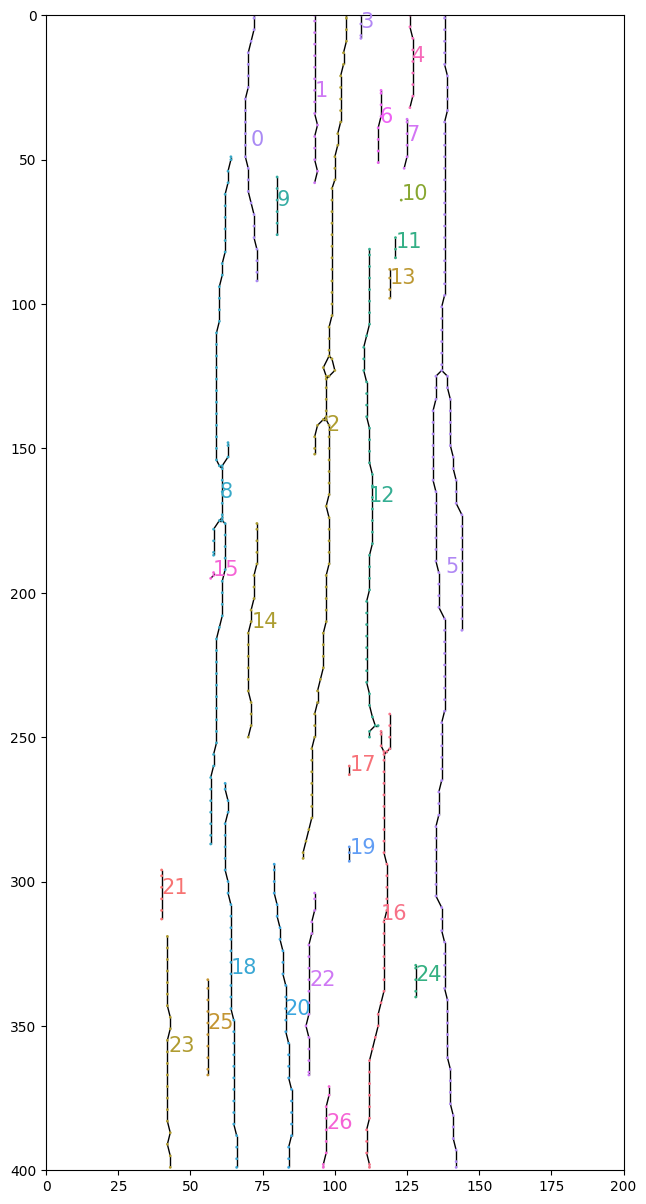

In [22]:
G = simplify(G, 2)

fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.imshow(np.zeros_like(strain_rate), 'gray_r', vmin=0)
plot_components(G, node_size=1, ax=ax)
ax.set_xlim(0,200)
ax.set_ylim(400,0)
plt.show()

In [23]:
print(G.nodes)

[0, 1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 92, 93, 95, 99, 103, 107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 152, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 271, 273, 278, 281, 284, 285, 286, 289, 293, 297, 299, 300, 301, 304, 305, 312, 313, 320, 321, 324, 327, 331, 335, 339, 343, 347, 351, 355, 359, 363, 367, 371, 375, 379, 383, 387, 391, 395, 399, 403, 407, 411, 415, 419, 423, 427, 431, 435, 439, 443, 447, 451, 455, 459, 463, 465, 466, 469, 473, 474, 475, 479, 483, 487, 491, 495, 499, 503, 507, 508, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545, 549, 553, 557, 561, 565, 569, 573, 577, 581, 585, 589, 593, 597, 601, 605, 609, 613, 617, 621, 625, 629, 631, 634, 635, 642, 643, 650, 651, 658, 659, 666, 667, 674, 675, 682, 683, 690, 691, 698, 699, 706, 707, 714, 715, 722, 723, 730, 731, 738, 739, 746, 747, 754, 755, 7

In [24]:
print(G.nodes[0])

{'pos': (72, 0), 'component': 0}


In [25]:
G.nodes[0]['strain_rate'] = strain_rate[int(G.nodes[0]['pos'][0]), int(G.nodes[0]['pos'][1])]
     

print(G.nodes[0])

{'pos': (72, 0), 'component': 0, 'strain_rate': 2.514241373407872e-18}


In [26]:
for node in G.nodes:
  G.nodes[node]['strain_rate'] = strain_rate[int(G.nodes[node]['pos'][1]), int(G.nodes[node]['pos'][0])]
 

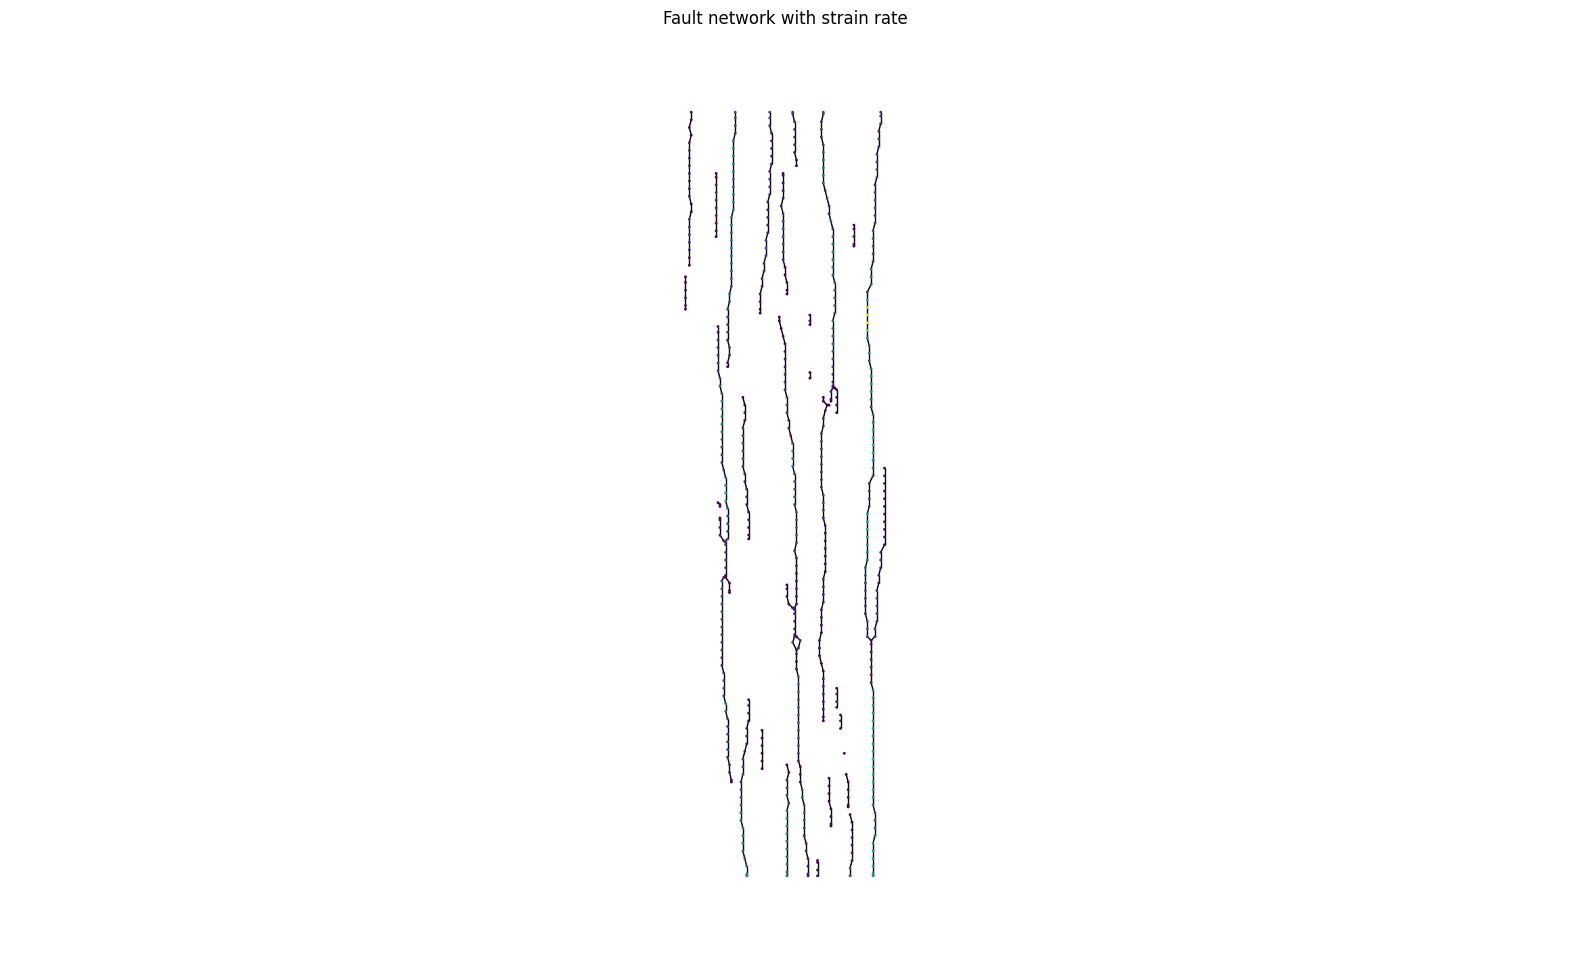

In [27]:
fig, ax = plt.subplots(figsize=(20,12))

ax.set_title('Fault network with strain rate')
nx.draw(G, 
        pos=nx.get_node_attributes(G, 'pos'),
        node_color = np.array([G.nodes[node]['strain_rate'] for node in G.nodes]), 
        node_size=1,
        ax=ax)
ax.axis('equal')
plt.show()

In [28]:
print(G.edges)

[(0, 1), (1, 5), (5, 9), (9, 13), (13, 17), (17, 21), (21, 25), (25, 29), (29, 33), (33, 37), (37, 41), (41, 45), (45, 49), (49, 53), (53, 57), (57, 61), (61, 65), (65, 69), (69, 73), (73, 77), (77, 81), (81, 85), (85, 89), (89, 92), (93, 95), (95, 99), (99, 103), (103, 107), (107, 111), (111, 115), (115, 119), (119, 123), (123, 127), (127, 131), (131, 135), (135, 139), (139, 143), (143, 147), (147, 151), (152, 153), (153, 157), (157, 161), (161, 165), (165, 169), (169, 173), (173, 177), (177, 181), (181, 185), (185, 189), (189, 193), (193, 197), (197, 201), (201, 205), (205, 209), (209, 213), (213, 217), (217, 221), (221, 225), (225, 229), (229, 233), (233, 237), (237, 241), (241, 245), (245, 249), (249, 253), (253, 257), (257, 261), (261, 265), (265, 269), (269, 271), (271, 273), (271, 278), (273, 281), (278, 284), (281, 285), (284, 285), (284, 286), (285, 286), (286, 289), (289, 293), (293, 297), (297, 299), (299, 300), (299, 301), (300, 301), (300, 304), (301, 305), (304, 312), (30

In [29]:
print(G.edges[(0, 1)])

{}


In [30]:
edge = (0, 1)
G.edges[edge]['length'] = np.linalg.norm(np.array(G.nodes[edge[0]]['pos'])-np.array(G.nodes[edge[1]]['pos']))
     

print(G.edges[(0, 1)])

{'length': 1.0}


In [31]:
for edge in G.edges:
  G.edges[edge]['length'] = np.linalg.norm(np.array(G.nodes[edge[0]]['pos'])-np.array(G.nodes[edge[1]]['pos']))

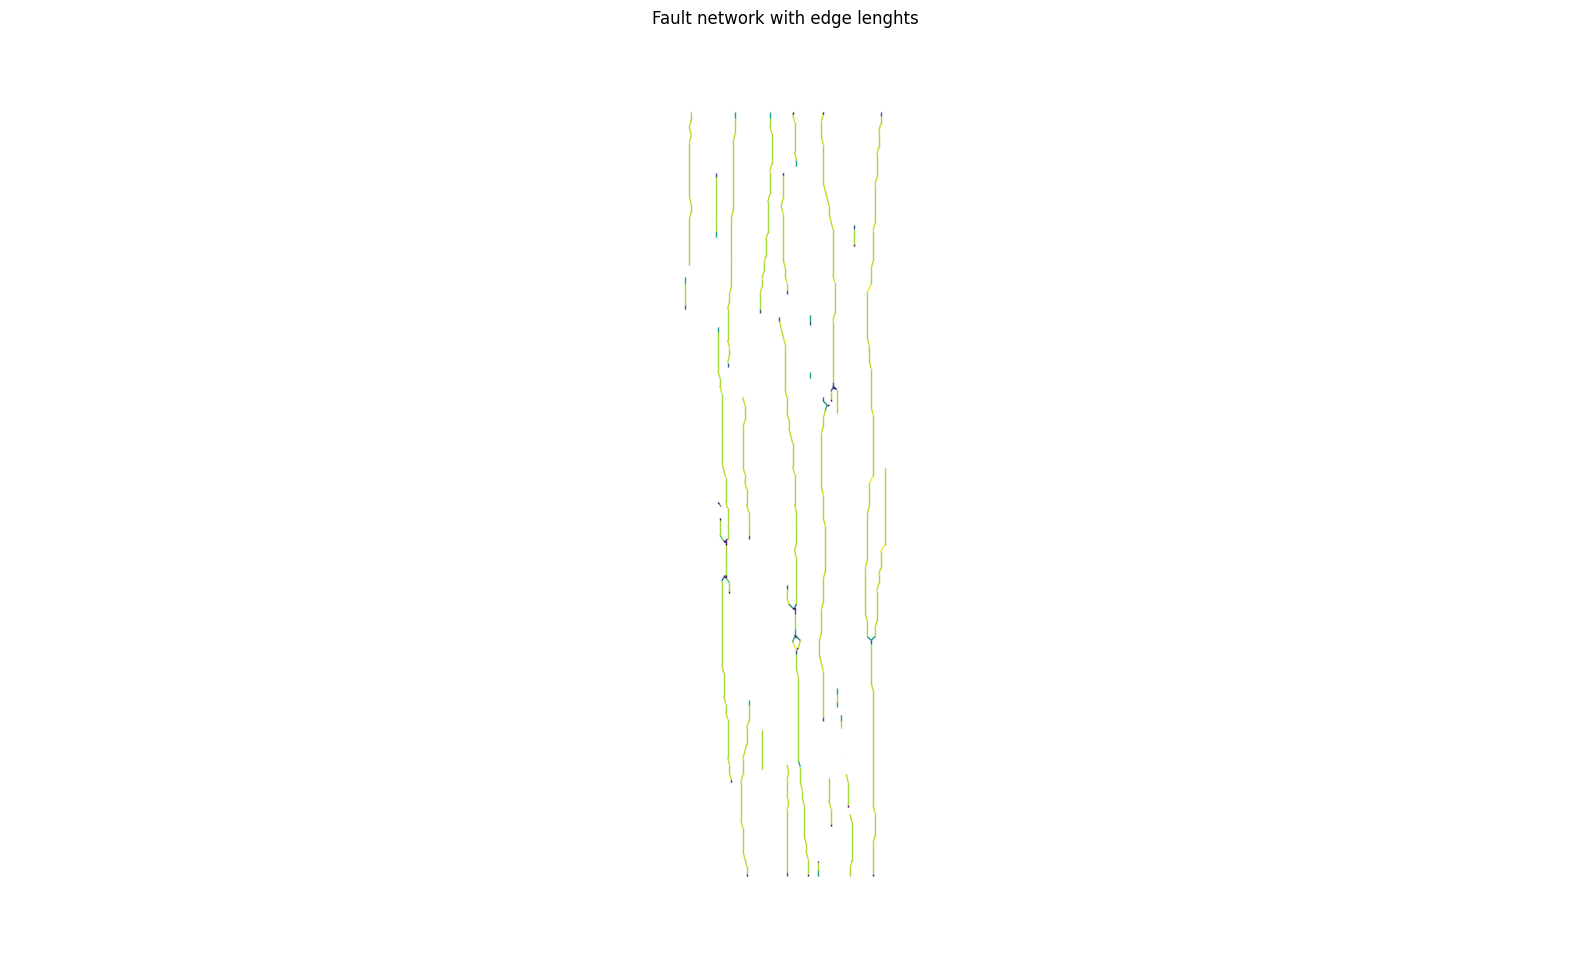

In [32]:
fig, ax = plt.subplots(figsize=(20,12))

ax.set_title('Fault network with edge lenghts')
nx.draw(G, 
        pos=nx.get_node_attributes(G, 'pos'),
        edge_color = np.array([G.edges[edge]['length'] for edge in G.edges]), 
        node_size=0.001,
        ax=ax)
ax.axis('equal')
plt.show()